In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
plt.style.use('dark_background')

In [ ]:
DATASET = 'https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/refs/heads/main/datasets/abalone.csv'

In [ ]:
df_pol = pl.read_csv(DATASET)

In [ ]:
df = pd.read_csv(DATASET)

In [ ]:
len(df_pol) # Размер таблицы

4177

In [ ]:
df_pol.schema # Проверка типов столбцов

Schema([('Sex', String),
        ('Length', Float64),
        ('Diameter', Float64),
        ('Height', Float64),
        ('Whole weight', Float64),
        ('Shucked weight', Float64),
        ('Viscera weight', Float64),
        ('Shell weight', Float64),
        ('Rings', Int64)])

In [ ]:
df_pol.shape # Кол-во строк и столбцов

(4177, 9)

In [ ]:
df.isna().mean() # Проверка пропусков в данных

,0
Sex,0.000000
Length,0.000000
Diameter,0.023701
Height,0.000000
Whole weight,0.023701
Shucked weight,0.000000
Viscera weight,0.000000
Shell weight,0.011970
Rings,0.000000


В данных незначительное кол-во пропусков, заменю их на медиану или среднее

In [ ]:
df.duplicated().sum() # Дубликаты отсутствуют

np.int64(0)

<Axes: xlabel='Diameter', ylabel='Count'>

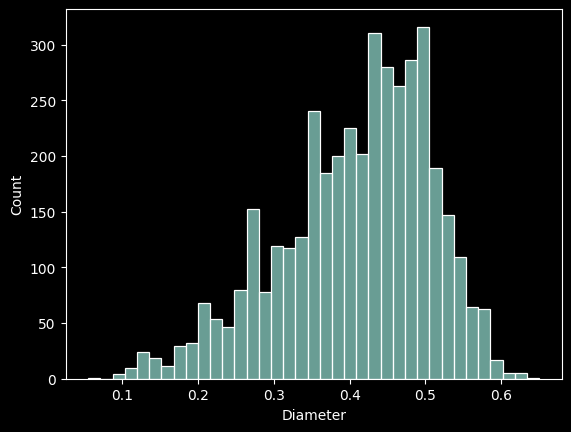

In [ ]:
sns.histplot(df['Diameter']) # Распределение не нормальное

In [ ]:
median_diameter = df['Diameter'].median()

<Axes: xlabel='Whole weight', ylabel='Count'>

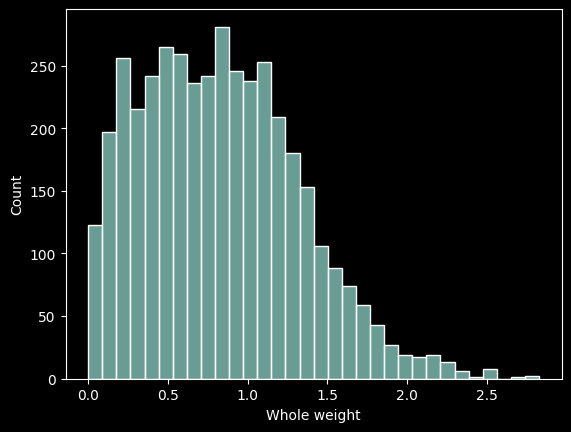

In [ ]:
sns.histplot(df['Whole weight']) # Распределение не нормальное

In [ ]:
median_whole_weight = df['Whole weight'].median()

<Axes: xlabel='Shell weight', ylabel='Count'>

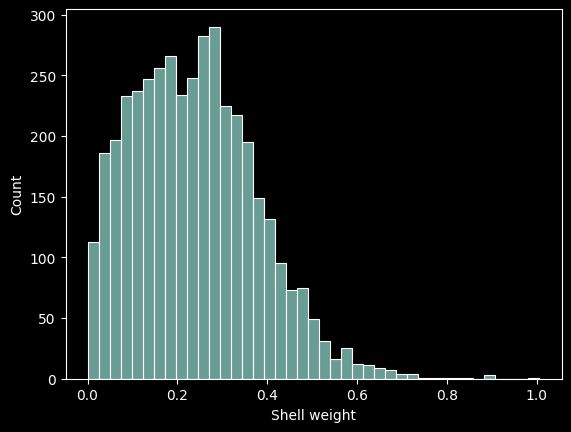

In [ ]:
sns.histplot(df['Shell weight']) # Распределение не нормальное

In [ ]:
median_shell_weight = df['Shell weight'].median()

In [ ]:
df['Diameter'] = df['Diameter'].fillna(median_diameter) # Замена пропусков на медианные значения
df['Whole weight'] = df['Whole weight'].fillna(median_whole_weight)
df['Shell weight'] = df['Shell weight'].fillna(median_shell_weight)

In [ ]:
df.isna().mean() # Проверка, что пропусков больше нет

,0
Sex,0.0
Length,0.0
Diameter,0.0
Height,0.0
Whole weight,0.0
Shucked weight,0.0
Viscera weight,0.0
Shell weight,0.0
Rings,0.0


TypeError: title() missing 1 required positional argument: 'label'

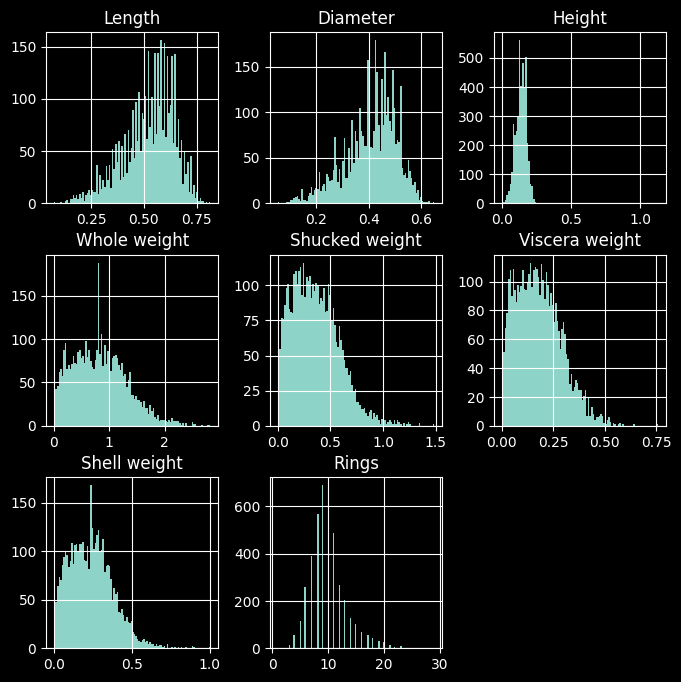

In [29]:
df.hist(bins=100, figsize=(8,8));

In [ ]:
corr = df.corr(numeric_only=True)

<Axes: >

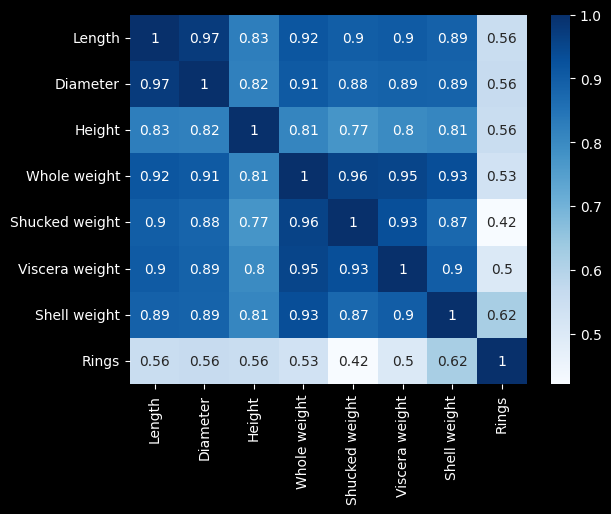

In [ ]:
sns.heatmap(corr, cmap='Blues', annot=True)

<Axes: xlabel='Rings', ylabel='Shell weight'>

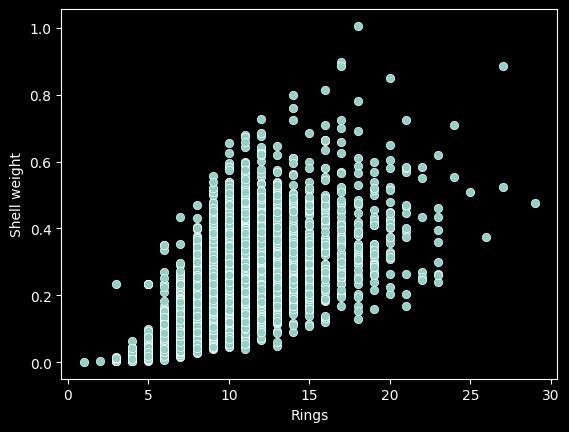

In [ ]:
sns.scatterplot(data=df, x='Rings', y='Shell weight')

In [ ]:
corr = df.corr(method='spearman', numeric_only=True)

<Axes: >

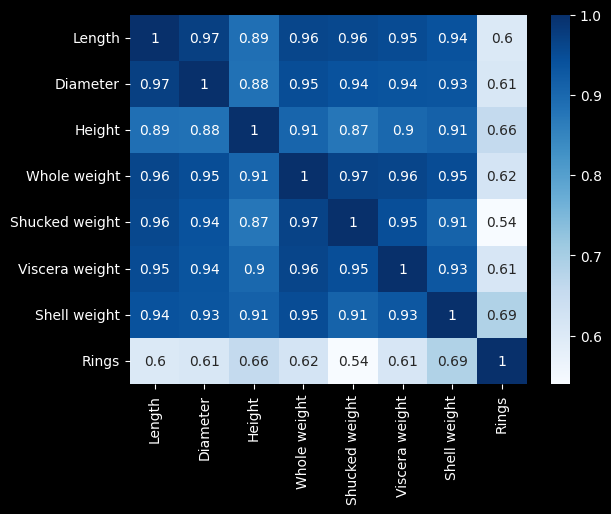

In [ ]:
sns.heatmap(corr, cmap='Blues', annot=True)

In [ ]:
corr = df.corr(method='kendall', numeric_only=True)

<Axes: >

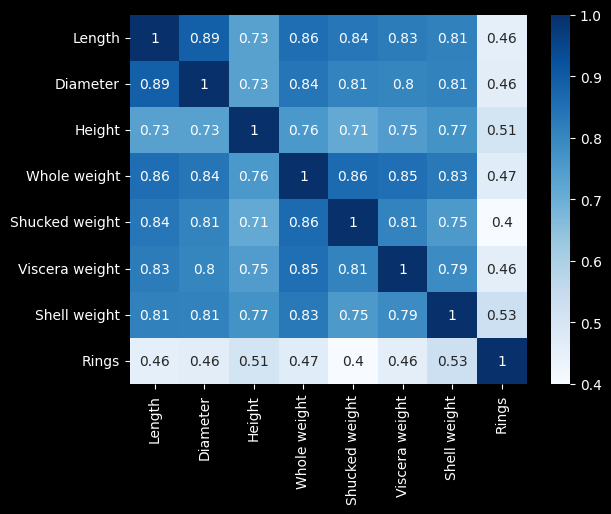

In [ ]:
sns.heatmap(corr, cmap='Blues', annot=True)

Корреляция целевой переменной Rings выше всего с весом раковины Shell Weight и высотой Height

In [ ]:
df.groupby('Sex')['Rings'].apply(list) # в колонке Sex есть дублирование значения женского пола F и f

,Rings
Sex,
F,"[9, 20, 16, 19, 14, 10, 10, 10, 12, 9, 10, 11,..."
I,"[7, 8, 7, 10, 5, 5, 4, 7, 6, 8, 4, 6, 7, 9, 7,..."
M,"[15, 7, 10, 9, 10, 11, 12, 7, 9, 11, 12, 15, 1..."
f,"[11, 18, 14, 10, 10, 10, 14, 8, 10, 14, 9, 3, ..."


In [ ]:
df['Sex'] = df['Sex'].replace('f', 'F') # исправил

In [ ]:
CategoryGroupLists = df.groupby('Sex')['Rings'].apply(list)

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, pval = f_oneway(*CategoryGroupLists)

In [ ]:
pval # Статистически значимый уровень корреляции c целевой переменной Rings

np.float64(2.35303895865748e-182)

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 14.8 MB/s eta 0:00:00


In [ ]:
import pingouin as pg

In [ ]:
pg.anova(data=df, dv='Rings', between='Sex') # проверка с помощью другой библиотеки

,Source,ddof1,ddof2,F,p-unc,np2
0,Sex,2,4174,463.062924,2.353039e-182,0.181589


<Axes: xlabel='Rings', ylabel='Count'>

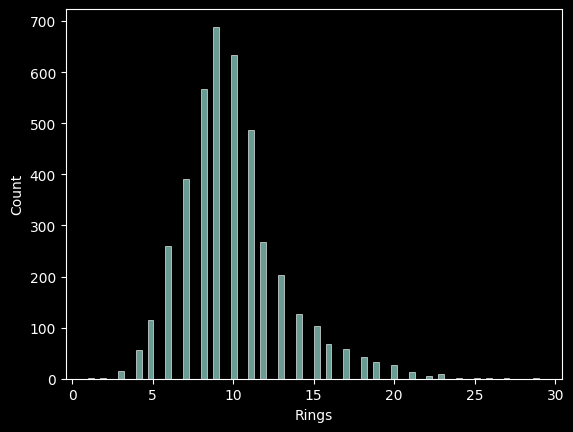

In [ ]:
sns.histplot(df['Rings'])

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

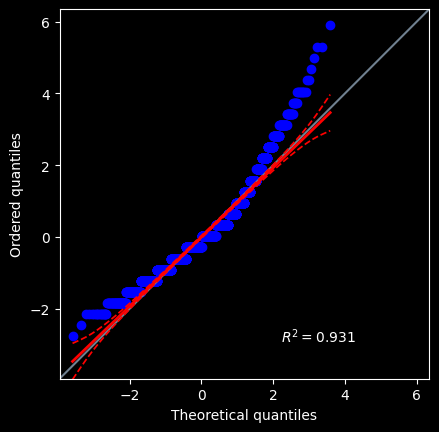

In [ ]:
pg.qqplot(df['Rings'])

Распределение целевой переменной не является нормальным.

Код для того, чтобы точно понять каким является распределение целевой переменной 👇

  1 / 108: ksone
  2 / 108: kstwo
  3 / 108: kstwobign
  4 / 108: norm
  5 / 108: alpha
  6 / 108: anglit
  7 / 108: arcsine
  8 / 108: beta
  9 / 108: betaprime
 10 / 108: bradford
 11 / 108: burr
 12 / 108: burr12
 13 / 108: fisk
 14 / 108: cauchy
 15 / 108: chi
 16 / 108: chi2
 17 / 108: cosine
 18 / 108: dgamma
 19 / 108: dweibull
 20 / 108: expon
 21 / 108: exponnorm
 22 / 108: exponweib
 23 / 108: exponpow
 24 / 108: fatiguelife
 25 / 108: foldcauchy
 26 / 108: f
 27 / 108: foldnorm
 28 / 108: weibull_min
 29 / 108: truncweibull_min
 30 / 108: weibull_max
 31 / 108: genlogistic
 32 / 108: genpareto
 33 / 108: genexpon
 34 / 108: genextreme
 35 / 108: gamma
 36 / 108: erlang
 37 / 108: gengamma
 38 / 108: genhalflogistic
 39 / 108: genhyperbolic
 40 / 108: gompertz
 41 / 108: gumbel_r
 42 / 108: gumbel_l
 43 / 108: halfcauchy
 44 / 108: halflogistic
 45 / 108: halfnorm
 46 / 108: hypsecant
 47 / 108: gausshyper
 48 / 108: invgamma
 49 / 108: invgauss
 50 / 108: geninvgauss
 51 / 1

Text(0, 0.5, 'Frequency')

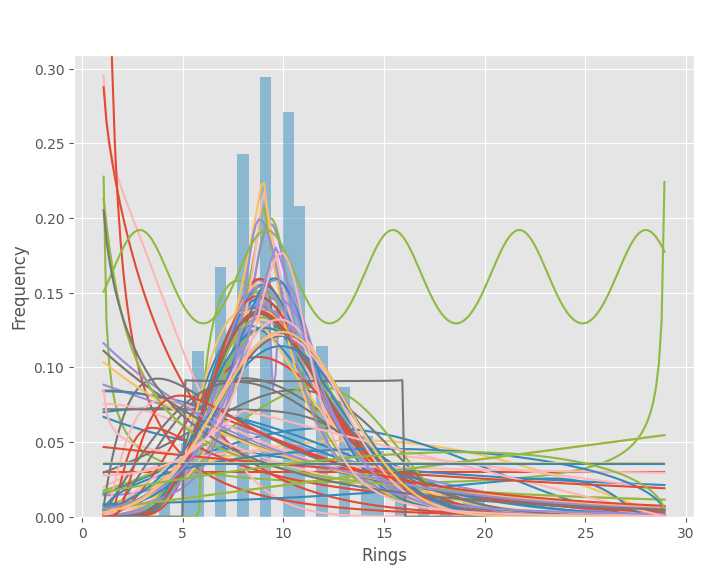

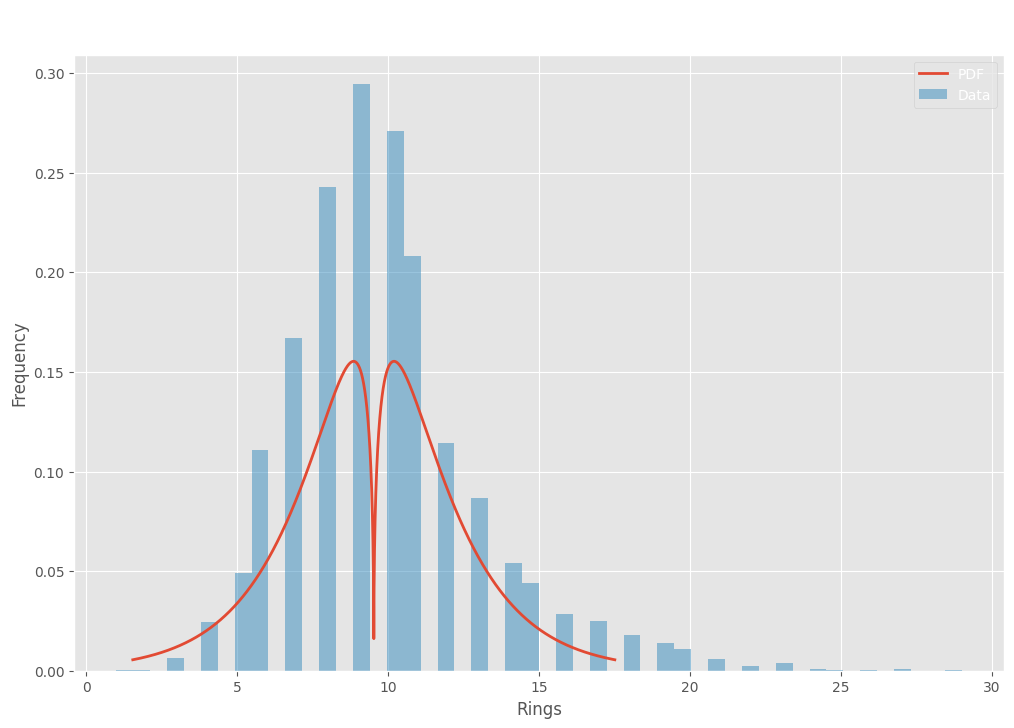

In [ ]:
import warnings
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))

        except Exception:
            pass


    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = df['Rings']

# Plot for comparison
plt.figure(figsize=(8,6))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Rings')
ax.set_ylabel('Frequency')

# Make PDF with best params
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Rings')
ax.set_ylabel('Frequency')

In [ ]:
pd.DataFrame(best_distibutions).sort_values(2)[0][0] #распределение, которое дало наименьшую ошибку

<Axes: xlabel='Rings', ylabel='Count'>

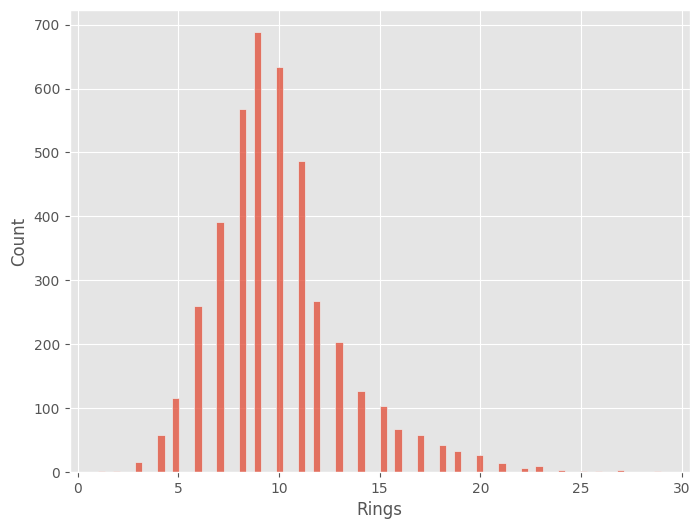

In [ ]:
sns.histplot(df['Rings'])

Из-за наличия хвоста справа в данных, модель будет плохо прогнозировать цены, находящиеся в нем, из-за того, что там мало данных. То есть значения Rings , примерно, после 15 будет прогнозироваться моделью с большей ошибкой

In [ ]:
df_big = df.copy()

for _ in range(250):
  df_big = pd.concat([df_big, df])

In [ ]:
len(df_big)

1048427

In [ ]:
df_big.to_csv('abalone_big.csv', index=False)

In [ ]:
%%time
df = pd.read_csv('abalone_big.csv')

CPU times: user 745 ms, sys: 51.2 ms, total: 796 ms
Wall time: 794 ms


In [ ]:
%%time
df_pl = pl.read_csv('abalone_big.csv')

CPU times: user 746 ms, sys: 65.1 ms, total: 811 ms
Wall time: 419 ms


Провел загрузку 5 раз подряд, в среднем, polars примерно на 40% быстрее загружает датасет

In [ ]:
%%time
df.query('Rings <= 15')

CPU times: user 56.6 ms, sys: 28.2 ms, total: 84.8 ms
Wall time: 89.7 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
1048422,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
1048423,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
1048424,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
1048425,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
%%time
df_pl.filter(pl.col('Rings') <= 15)

CPU times: user 22.9 ms, sys: 60.6 ms, total: 83.5 ms
Wall time: 46.2 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""M""",0.44,0.365,0.125,0.7985,0.2155,0.114,0.155,10
"""I""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
…,…,…,…,…,…,…,…,…
"""F""",0.565,0.45,0.165,0.887,0.37,0.239,0.249,11
"""M""",0.59,0.44,0.135,0.966,0.439,0.2145,0.2605,10
"""M""",0.6,0.475,0.205,1.176,0.5255,0.2875,0.308,9


In [ ]:
%%time
df.query('Rings <= 15 & Sex == "F"')

CPU times: user 78.2 ms, sys: 8.91 ms, total: 87.1 ms
Wall time: 96 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
10,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,14
13,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.2050,10
14,F,0.470,0.355,0.100,0.4755,0.1675,0.0805,0.1850,10
17,F,0.440,0.340,0.100,0.4510,0.1880,0.0870,0.1300,10
...,...,...,...,...,...,...,...,...,...
1048410,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11
1048411,F,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11
1048418,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8
1048422,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


In [ ]:
%%time
df_pl.filter((pl.col('Rings') <= 15) & (pl.col('Sex') == 'F'))

CPU times: user 34.9 ms, sys: 25.2 ms, total: 60.1 ms
Wall time: 43.4 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""F""",0.525,0.38,0.14,0.6065,0.194,0.1475,0.21,14
"""F""",0.535,0.405,0.145,0.6845,0.2725,0.171,0.205,10
"""F""",0.47,0.355,0.1,0.4755,0.1675,0.0805,0.185,10
"""F""",0.44,0.34,0.1,0.451,0.188,0.087,0.13,10
…,…,…,…,…,…,…,…,…
"""F""",0.585,0.475,0.165,1.053,0.458,0.217,0.3,11
"""F""",0.585,0.455,0.17,0.9945,0.4255,0.263,0.2845,11
"""F""",0.515,0.4,0.125,0.615,0.2865,0.123,0.1765,8


Polars примерно в 1,5 раза быстрее фильтрует данные

In [ ]:
%%time
df.groupby('Sex').agg(mean_diameter=('Diameter','mean'), median_height=('Height', 'median'))

CPU times: user 111 ms, sys: 34.2 ms, total: 145 ms
Wall time: 146 ms


,mean_diameter,median_height
Sex,,
F,0.448652,0.155
I,0.328382,0.110
M,0.438072,0.150


In [ ]:
%%time
df_pl.group_by('Sex').agg([pl.mean('Diameter'), pl.median('Height')])

CPU times: user 101 ms, sys: 49.1 ms, total: 150 ms
Wall time: 101 ms


Sex,Diameter,Height
str,f64,f64
"""I""",0.328382,0.11
"""M""",0.438072,0.15
"""F""",0.448652,0.155


Polars примерно в 1,5 раза быстрее агрегирует данные

**Polars быстрее чем Pandas выполняет операции**